## IMPORT PACKAGES

In [68]:
import pandas as pd
import sys
from matplotlib import pyplot as plt

sys.path.append('../../')
from utils import microarray_utils, clustering_utils, bokeh_ui_utils

In [69]:
full_filtered_df = pd.read_csv('../microarray_probe_alignment_and_filtering/allgood_filt_agg_tidy_2021aligned_qc_rma_expression_full.csv')
full_filtered_df = full_filtered_df.rename(columns={'Unnamed: 0': 'TTHERM_ID'})
full_filtered_norm_df = microarray_utils.normalize_expression_per_gene(full_filtered_df, z=True)

num_genes = full_filtered_df.shape[0]
num_genes

19152

In [70]:
full_filtered_df.sample(10)

,TTHERM_ID,Ll_GSM283687,Ll_GSM284355,Ll_GSM284362,Lm_GSM283690,Lm_GSM284357,Lm_GSM284363,Lh_GSM283691,Lh_GSM284360,Lh_GSM284364,...,C12_GSM656237,C14_GSM285580,C14_GSM285593,C14_GSM656238,C16_GSM285582,C16_GSM285595,C16_GSM656239,C18_GSM285583,C18_GSM285596,C18_GSM656240
9771,YF00016988.t1,8.933194,7.815872,8.435650,8.458440,8.135554,8.250733,7.551519,8.416128,8.341006,...,6.813268,8.229515,7.391789,6.977678,7.211211,7.049063,9.343784,5.719559,6.271833,7.910786
5013,YF00008291.t1,8.460866,8.558615,8.201425,8.753801,9.010478,8.687357,9.130913,9.640866,9.548980,...,9.459447,8.782932,9.217817,9.223453,9.199104,9.031184,9.495212,9.864706,9.421787,9.660346
7455,YF00013016.t1,7.936797,7.657400,8.080172,8.381514,7.325124,7.862322,8.344106,8.066995,8.436070,...,8.157462,7.988243,7.651015,7.566549,8.094273,8.179886,8.275652,7.800420,7.873661,8.849322
7444,YF00013004.t1,8.951913,7.925283,8.285642,9.126717,8.699859,8.692536,9.427440,8.434074,8.515811,...,8.782259,9.944667,9.681167,8.827016,9.583235,9.648502,9.423064,9.581201,9.733829,9.051341
16946,YF00029475.t1,7.832583,7.118709,8.035779,8.771393,7.538605,7.454201,8.940774,7.589840,8.279379,...,9.472759,9.172591,9.436277,8.777539,9.276219,9.210993,8.317559,9.442529,9.017966,8.655971
2964,YF00004935.t1,11.447208,11.064740,11.306539,11.935783,11.533142,11.739234,11.874828,11.389935,11.919800,...,11.721801,10.394714,10.434142,11.270086,11.047889,11.210758,11.394746,10.807140,11.059068,11.397032
13970,YF00023806.t1,12.607204,12.849314,12.747515,12.608220,12.469983,12.854370,12.650159,13.073496,13.009228,...,11.741580,12.006393,11.588014,11.852411,11.760125,11.662308,11.638826,11.148546,11.260747,11.241036
254,YF00000414.t1,6.244552,5.454403,7.320510,4.771684,4.937735,4.663025,5.536367,5.954761,6.948526,...,4.517677,4.772749,4.999008,4.687422,4.956209,4.675584,4.510436,4.537501,5.670382,4.580399
12004,YF00020444.t1,5.075467,5.250681,5.570324,5.209509,5.167134,5.111906,5.275819,4.806391,4.820955,...,5.682310,5.028514,5.259486,5.229488,5.392741,4.930443,6.026039,5.633178,5.379871,5.737280
13719,YF00023441.t1,6.157262,6.951789,6.462003,6.685396,6.399836,6.937299,5.373925,6.938210,7.113850,...,7.008626,6.106871,6.574782,6.030249,5.601926,6.054202,5.687899,5.688788,5.848810,5.731422


# LEIDEN CLUSTERING

In [72]:
phases = 'full'

In [73]:
leiden_label_df_round_1, partition_stats, cluster_sizes, enriched_cluster_sizes =  clustering_utils.build_label_df(
    full_filtered_norm_df, 
    # metric='minkowski_3.0', 
    metric='manhattan',
    n_neighbors=3, 
    # resolution_param=0.080, 
    resolution_param=0.005, 
    partition_type = 'EXP', 
    n_jobs = -1, 
    random_state=42
    )

In [74]:
leiden_label_df_round_1_arranged = bokeh_ui_utils.arrange_modules(full_filtered_norm_df, leiden_label_df_round_1, phases) 
leiden_label_df_round_1_arranged_sorted = leiden_label_df_round_1_arranged.sort_values(by=['label', 'TTHERM_ID'], ascending=False)
leiden_label_df_round_1_arranged_sorted.to_csv('./test_nn3_leiden_label_df_round_1.csv', index=False)

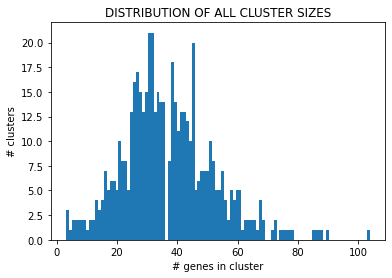

In [75]:
plt.hist(cluster_sizes, max(cluster_sizes))
plt.title('DISTRIBUTION OF ALL CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

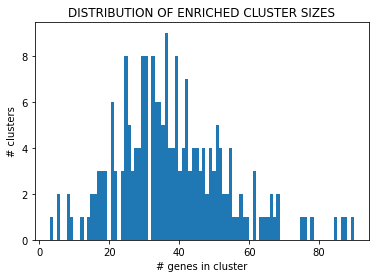

In [76]:
plt.hist(enriched_cluster_sizes, max(enriched_cluster_sizes))
plt.title('DISTRIBUTION OF ENRICHED CLUSTER SIZES')
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

In [77]:
key_lens = [len(k) for k in partition_stats.keys()]
max_key_len = max(key_lens)

for k, v in partition_stats.items():
    print(f'{" " * (max_key_len - len(k))}{k}:', v)

              partition_type: EXP
              dimensionality: baseline
                      metric: manhattan
                       graph: umap_fuzzy_simplicial_set
                         nns: 3
                  clustering: leiden_cpm
                   parameter: 0.005
            silhouette_score: -0.018823783763944602
                  modularity: 0.7508531209479838
                   nclusters: 518
           mean_cluster_size: 36.972972972972975
         median_cluster_size: 35.0
             sd_cluster_size: 15.19179960805552
          nenriched_clusters: 205
  mean_enriched_cluster_size: 38.11219512195122
median_enriched_cluster_size: 36.0
    sd_enriched_cluster_size: 15.791695797381907
     nenriched_cluster_genes: 7813
                    datetime: 2024-04-17 12:13:32.769858


In [78]:
# for MCL
def leiden_clustering_df_to_csv(df, export_file_path):
    current_module = list(df['label'].values)[0]

    new_cluster = True

    with open(export_file_path, 'w') as f:
        for idx, row in df.iterrows():
            if current_module != row['label']:
                current_module = row['label']
                f.write('\n')
                new_cluster =True

            elif not new_cluster:
                f.write('\t')
            
            f.write(row['TTHERM_ID'])
            new_cluster = False

        f.write('\n')
    
    print(export_file_path, 'successfully exported.')